# Block [1-3]

First, let's explore of data. In addition to the Binance 1-hour OHLCV data from 2017-08-17 to 2021-11-10, we have added several indicators.

In [1]:
import numpy as np
import pandas as pd
import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read csv
source = pd.read_csv('binance_btc_1h.csv')
df = source.copy()
#set date and index
df['Date'] = pd.to_datetime(source['Date'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Date', inplace=True)

In [3]:
df

,Open,High,Low,Close,Volume,Numtr,sma9,sma20,sma50,sma200,true_range,atr14,rsi,candle_14
Date,,,,,,,,,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,171.0,NaN,NaN,NaN,NaN,52.30,NaN,NaN,NaN
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,102.0,NaN,NaN,NaN,NaN,37.32,NaN,NaN,NaN
2017-08-17 06:00:00,4315.32,4345.45,4309.37,4324.35,7.229691,36.0,NaN,NaN,NaN,NaN,36.08,NaN,NaN,NaN
2017-08-17 07:00:00,4324.35,4349.99,4287.41,4349.99,4.443249,25.0,NaN,NaN,NaN,NaN,62.58,NaN,NaN,NaN
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,28.0,NaN,NaN,NaN,NaN,44.53,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-10 19:00:00,67790.44,68013.64,66542.85,66650.99,2960.305540,127841.0,67695.636667,67129.1930,67230.7274,63612.51460,1470.79,719.008571,43.797253,-47.144097
2021-11-10 20:00:00,66650.98,67047.27,64885.98,65840.26,8166.899500,245290.0,67617.132222,67071.3650,67229.2726,63626.72430,2161.29,845.315714,37.616805,-101.685233
2021-11-10 21:00:00,65840.26,66200.01,62822.90,64251.23,11892.234860,374311.0,67378.715556,66933.0085,67197.5970,63631.01275,3377.11,1054.336429,28.983693,-207.924145


# Block [4-8]

Now let’s label our data based on our SMA crossover strategy. To demonstrate that when SMA9 > SMA20 it’s a buy signal so we label our data as “traget_long” and on the other hand when SMA9 < SMA20 it’s a sell signal so we label our data as “target_short”

In [4]:
#defining functions to label data based on our algorithmic strategy (here SMA crossover)

#add long labels to df
def add_label_long(data):
    #first define all long label column as nan 
    data['target_long'] = np.nan
    #add long label based on our strategy
    data['target_long'] = np.select([(data.sma9 > data.sma20)], [1] , 0)
    return data 

#add short labels to df
def add_label_short(data):
    #first define all short label column as nan 
    data['target_short'] = np.nan
    #add short label based on our strategy
    data['target_short'] = np.select([(data.sma9 < data.sma20)], [1] , 0)
    return data 

In [5]:
#add long labels to dataframe
df_labeled = add_label_long(df)
print('Long #Labels {}'.format(df_labeled.target_long.sum()))

#add short labels o dataframe
df_labeled = add_label_short(df_labeled)
print('Short #Labels {}'.format(df_labeled.target_short.sum()))

#save labeled file for further usage
df_labeled.to_csv('labeled.csv', index = True, header=True)

Long #Labels 19824
Short #Labels 17281


In [6]:
#import pyplot library for visualization
%matplotlib widget
import matplotlib.pyplot as plt

In [7]:
#DATE from
_from = '2019-01-01 00:00:00'
#DATE TO
_to = '2021-10-01 00:00:00'
#copy desired section of labeled dataframe for visuazlization and backtest
sect = df_labeled.loc[_from:_to,:].copy()
sect['long_labeled'] = np.select([(sect.target_long == 1)], [sect.Close] , np.nan)
sect['short_labeled'] = np.select([(sect.target_short == 1)], [sect.Close] , np.nan)

Then we will visualize the data using the pyplot library. Green points are long labeled and red points are short labeled. And SMA9 and SMA20 are blue and yellow lines, respectively.

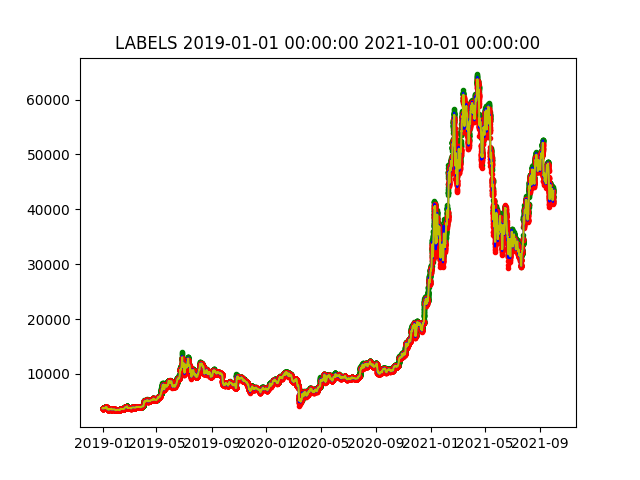

In [8]:
fig = plt.figure()
##visualizing data
plt.title('LABELS ' + _from + ' ' +  _to)

#Custom PLOT
plt.plot(sect.index.values,sect.sma9, color="b")
plt.plot(sect.index.values,sect.sma20, color="y")
plt.scatter(sect.index.values,sect.long_labeled,marker="." , color="g" )
plt.scatter(sect.index.values,sect.short_labeled,marker="." , color="r" )
#End 
plt.show()

# Block [9-13]

Backtesting library provides a class called Strategy that lets you define your own strategy for opening and closing long and short positions. Our strategy is to open long positions when we reach a "bull" point, and to close long positions when we reach a "bear" point, and to do the reverse for short positions. Our dataset has two additional columns called "bull" and "bear" that are the same as "target_long" and "target_short" in our crossover strategy, but you can flag your data either as bull or bear if you wish to use a different strategy for labeling. In this way, we don't have to change our backtesting strategy whenever we change our labeling strategy.

In [9]:
# Importing backtesting library
from backtesting import Backtest, Strategy
from backtesting.test import SMA

Loading BokehJS ...

In [10]:
#Here is where we defined required parameters for our backtest strategy, This will also help visuazlizing them on the chart
def BULL(array):
    return pd.Series(array)
def BEAR(array):
    return pd.Series(array)

In [11]:
# The strategy we use for opening positions based on our bull or bear labels
class bullbearStrategy(Strategy):
    def init(self):
        self.bull = self.I(BULL, self.data.bull)
        self.bear = self.I(BEAR, self.data.bear)
        
    def next(self):
        if self.position.is_long == False:
            if self.data.bull[-1] == 1  :
                self.buy(size=1, limit=None, stop=None,  sl=None , tp=None)
        else:
            if self.data.bear[-1] == 1:
                self.position.close()
                self.bullCounter = 0
                self.bullGap = 0
        if self.position.is_short == False:   
            if self.data.bear[-1] == 1  :
                self.sell(size=1, limit=None, stop=None,  sl=None , tp=None)
        else:
            if self.data.bull[-1] == 1:
                self.position.close()
                self.bullCounter = 0
                self.bullGap = 0

In [12]:
# We add bull and long columns to use them in our backtest function
sect['bull'] = sect['target_long']
sect['bear'] = sect['target_short']

In [13]:
#run backtest for crossover strategy with raw labels
bt = Backtest(sect, bullbearStrategy,cash=200000, commission=0, exclusive_orders=True)
stats =bt.run()

print(stats)
bt.plot()

Start                     2019-01-01 00:00:00
End                       2021-10-01 00:00:00
Duration                   1004 days 00:00:00
Exposure Time [%]                     99.9917
Equity Final [$]                     221133.3
Equity Peak [$]                     259866.73
Return [%]                           10.56665
Buy & Hold Return [%]             1080.832957
Return (Ann.) [%]                    3.753832
Volatility (Ann.) [%]                9.128022
Sharpe Ratio                         0.411243
Sortino Ratio                        0.628337
Calmar Ratio                         0.203167
Max. Drawdown [%]                  -18.476586
Avg. Drawdown [%]                   -0.496951
Max. Drawdown Duration      199 days 00:00:00
Avg. Drawdown Duration        5 days 22:00:00
# Trades                                 1394
Win Rate [%]                        36.083214
Best Trade [%]                       26.41759
Worst Trade [%]                    -10.084525
Avg. Trade [%]                    

GridPlot(id='p1644', ...)

# Block [14-19]

The solution for correcting our labels is that we remove the labels that have given us loss in our trades when we have opened buy or sell positions. To do that we iterate through our labels one by one, we simulate our backtest strategy and change the label when it gives us a loss.


In [14]:
#Recorrecting labels and remove those labels that give us loss in our trades
bull_position = 0
bull_position_open = 0
bull_last_index = 0
bear_position = 0
bear_position_open = 0
bear_last_index = 0

for index, row in sect.iterrows():
    if row.target_short == 1 and bear_position == 0:
        bear_position_open = row.Close
        bear_position = 1
        bear_last_index = index
            
    if bear_position == 1 and row.target_long == 1:
        bear_position = 0
        if bear_position_open < row.Close:
            loopSect = sect.loc[bear_last_index:index,:].copy()
            for loopindex, looprow in loopSect.iterrows():
                sect.at[loopindex , 'target_short'] =  0
                
                

for index, row in sect.iterrows():    
    if row.target_long == 1 and bull_position == 0:
        bull_position_open = row.Close
        bull_position = 1
        bull_last_index = index

    
    if bull_position == 1 and row.target_short == 1:
        bull_position = 0
        if bull_position_open > row.Close:
            loopSect = sect.loc[bull_last_index:index,:].copy()
            for loopindex, looprow in loopSect.iterrows():
                sect.at[loopindex , 'target_long'] =  0
        

In [15]:
df_corrected = sect.drop(['bull', 'bear'], axis=1)

In [16]:
df_corrected['long_labeled'] = np.select([(df_corrected.target_long == 1)], [df_corrected.Close] , np.nan)
df_corrected['short_labeled'] = np.select([(df_corrected.target_short == 1)], [df_corrected.Close] , np.nan)

In [17]:
#save corrected file for further usage
df_corrected.to_csv('labeled_corrected.csv', index = True, header=True)

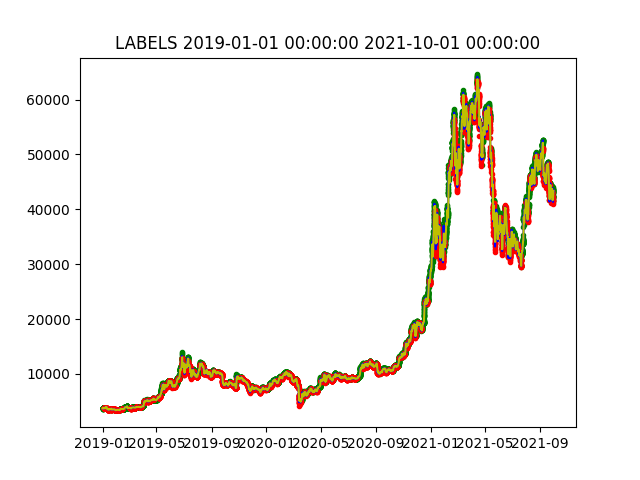

In [18]:
fig = plt.figure()
#####visualizing data
plt.title('LABELS ' + _from + ' ' +  _to)

####Custom PLOT
plt.plot(df_corrected.index.values,df_corrected.sma9, color="b")
plt.plot(df_corrected.index.values,df_corrected.sma20, color="y")
plt.scatter(df_corrected.index.values,df_corrected.long_labeled,marker="." , color="g" )
plt.scatter(df_corrected.index.values,df_corrected.short_labeled,marker="." , color="r" )
###End 
plt.show()

In [19]:
df_corrected['bull'] = df_corrected['target_long']
df_corrected['bear'] = df_corrected['target_short']

In [20]:
bt = Backtest(df_corrected, bullbearStrategy,cash=200000, commission=0, exclusive_orders=True)
stats =bt.run()

print(stats)
bt.plot()

Start                     2019-01-01 00:00:00
End                       2021-10-01 00:00:00
Duration                   1004 days 00:00:00
Exposure Time [%]                   99.950201
Equity Final [$]                    576665.53
Equity Peak [$]                      576839.6
Return [%]                         188.332765
Buy & Hold Return [%]             1080.832957
Return (Ann.) [%]                   46.877593
Volatility (Ann.) [%]                6.618414
Sharpe Ratio                         7.082904
Sortino Ratio                       38.458945
Calmar Ratio                        27.438408
Max. Drawdown [%]                   -1.708466
Avg. Drawdown [%]                   -0.114425
Max. Drawdown Duration       19 days 22:00:00
Avg. Drawdown Duration        0 days 19:00:00
# Trades                                  321
Win Rate [%]                            100.0
Best Trade [%]                      47.190223
Worst Trade [%]                      0.025722
Avg. Trade [%]                    

GridPlot(id='p3012', ...)